# package_LAB

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_LAB
from package_LAB import LeadLag_RT, PID_RT
import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

from importlib import reload
package_LAB = reload(package_LAB)

## LeadLag_RT()

(0.0, 100.0)

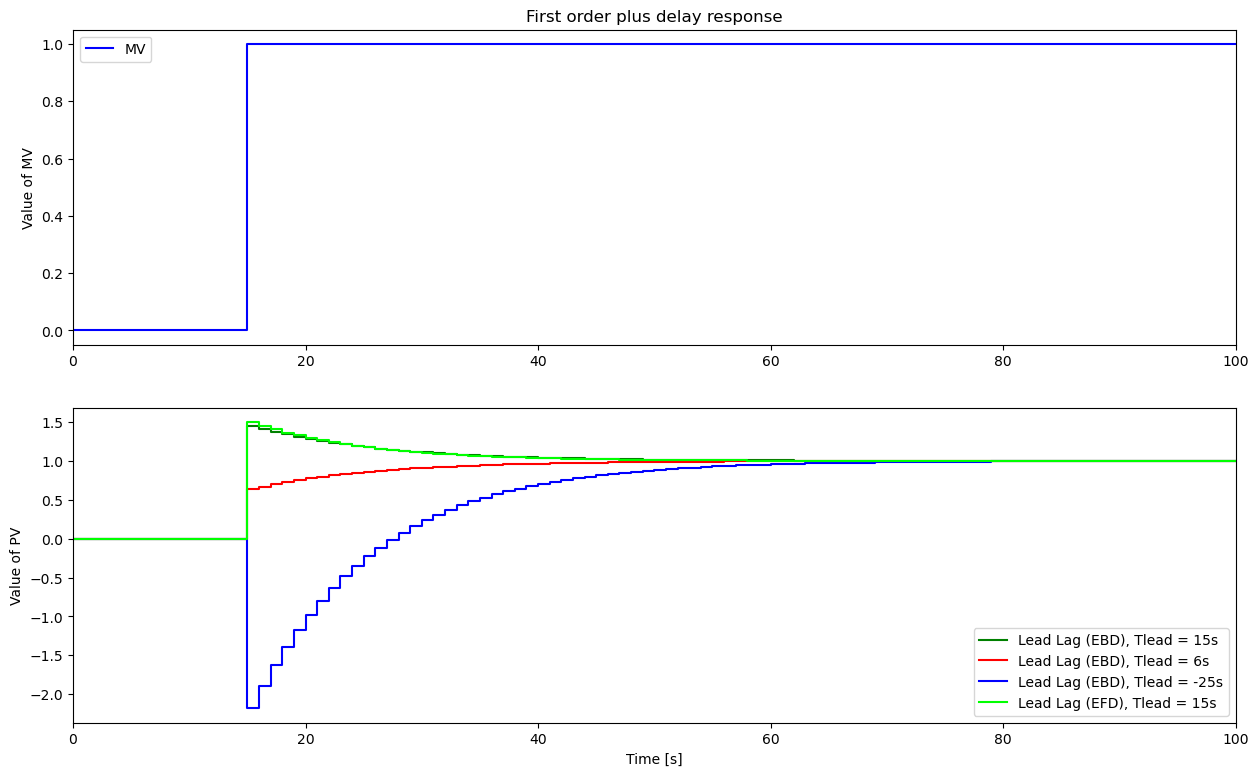

In [263]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 15: 1, TSim: 1}

t = []
MV = []
MVDelay = []
PV_EBD1 = []
PV_EBD2 = []
PV_EBD3 = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead1 = 15
Tlead2 = 6
Tlead3 = -25
Tlag = 10
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    LeadLag_RT(MV,Kp,Tlead1,Tlag,Ts,PV_EBD1)
    LeadLag_RT(MV,Kp,Tlead2,Tlag,Ts,PV_EBD2)
    LeadLag_RT(MV,Kp,Tlead3,Tlag,Ts,PV_EBD3)
    LeadLag_RT(MV,Kp,Tlead1,Tlag,Ts,PV_EFD,0,'EFD')
    #FO_RT(MV,Kp,T,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD1,'g-',label='Lead Lag (EBD), Tlead = 15s',where='post')
plt.step(t,PV_EBD2,'r-',label='Lead Lag (EBD), Tlead = 6s',where='post')
plt.step(t,PV_EBD3,'b-',label='Lead Lag (EBD), Tlead = -25s',where='post')
plt.step(t,PV_EFD,'lime',label='Lead Lag (EFD), Tlead = 15s',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

## PID_RT()

(0.0, 200.0)

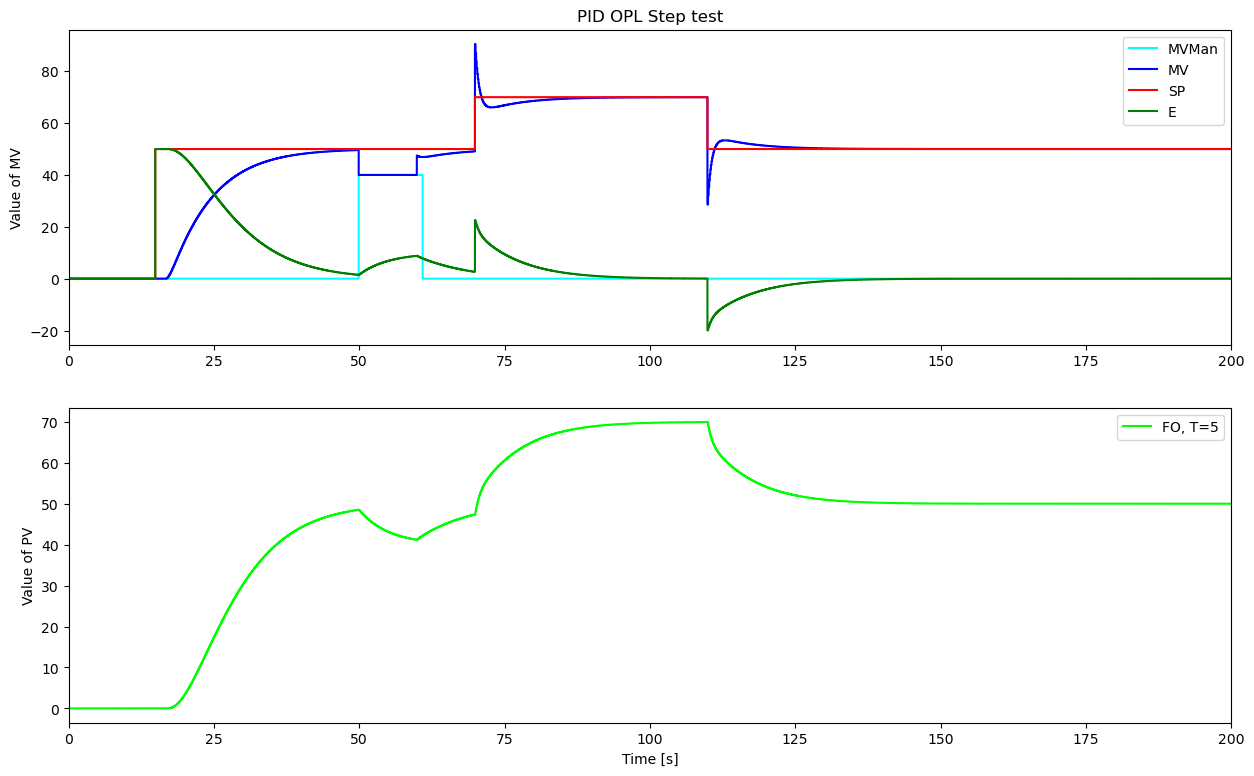

In [264]:
TSim = 200
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 15: 1, TSim: 1}
SPPath = {0:0, 15:50, 70:70, 110:50, TSim:50}
MVManPath = {0:0, 50:40, 61:0, TSim:0}
ManPath = {0:0, 50:1, 60:0, TSim:0}

t = []
MV = [0]
SP = []
PV = []
Man = []
MVMan = []
MVFF = []
MVP = []
MVI = []
MVD = []


# Parameters
Kp = 1
KpExp = 0.4971
KdExp = 0.3734
Kc = 1
Td = 1
Ti = 6
alpha = 0.9
theta_pExp = 4.386
MVMin = 0
MVMax = 100
E = []
ManFF=True
PVInit=0
method='EBD-EBD'



for i in range(0,N):
    t.append(i*Ts)
    #SelectPath_RT(MVPath,t,MV)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(MVManPath,t,MVMan)
    SelectPath_RT(ManPath,t,Man)
    
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF)
    
    FO_RT(MV,Kp,5,Ts,PV)
    


plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MVMan,'cyan',label='MVMan',where='pre')
plt.step(t,MV,'b-',label='MV',where='pre')
plt.step(t,SP,'r-',label='SP',where='pre')
plt.step(t,E,'g-',label='E',where='pre')
plt.ylabel('Value of MV')
plt.title('PID OPL Step test')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'lime',label='FO, T=5',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    